In [21]:
import keras
from src.Models.MLP import MLP
from src import utilities

#### Loading the data

In [22]:
y_train, X_train, _ = utilities.load_data_for_mlp('../Data/HiggsTrainning.csv')
y_val, X_val, _ = utilities.load_data_for_mlp('../Data/HiggsValidation.csv')
y_test, X_test, _ = utilities.load_data_for_mlp('../Data/HiggsTest.csv')

#### Defining the Model

In [23]:
# creating the model for the MLP
input_layer = keras.layers.Input(shape=[21])
mlp = MLP(num_neurons=32)(input_layer)
output_layer = keras.layers.Dense(2, activation='softmax')(mlp)
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_2 (MLP)                     │ (None, 32)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,266 (12.76 KB)

 Trainable params: 3,074 (12.01 KB)

 Non-trainable params: 192 (768.00 B)

In [24]:
# compiling and trainning the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.5440 - loss: 0.7068 - val_accuracy: 0.5711 - val_loss: 0.6725
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.5827 - loss: 0.6697 - val_accuracy: 0.6033 - val_loss: 0.6581
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.6006 - loss: 0.6608 - val_accuracy: 0.6029 - val_loss: 0.6561
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.6088 - loss: 0.6561 - val_accuracy: 0.6153 - val_loss: 0.6481
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.6153 - loss: 0.6506 - val_accuracy: 0.6248 - val_loss: 0.6433
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.6217 - loss: 0.6462 - val_accuracy: 0.6292 - val_loss: 0.6402
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.6272 - loss: 0.6416 - val_accuracy: 0.6358 - val_loss: 0.6335
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 

#### Some quick checks

In [25]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step


In [26]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.6990
Precision: 0.7060
Confusion Matrix:
[[20372  9838]
 [10171 23619]]
Validation set:
Recall: 0.6801
Precision: 0.6841
Confusion Matrix:
[[4907 2651]
 [2701 5741]]
Test set:
Recall: 0.6677
Precision: 0.6796
Confusion Matrix:
[[6061 3338]
 [3523 7079]]


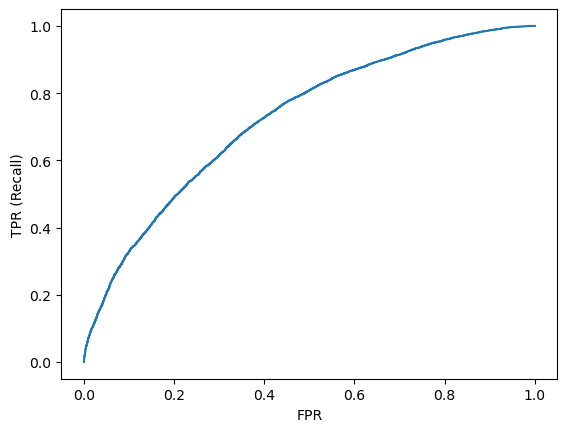

AUC: 0.7248


In [27]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

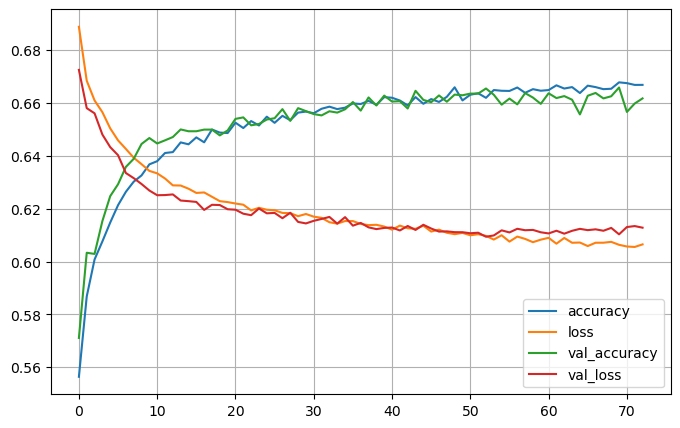

In [28]:
utilities.plot_hist_trainning(history)

In [29]:
utilities.save_model(model, history, "ModelFiles/MLP")